In [36]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from thinkbayes2 import Cdf as CDF

import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
import warnings
warnings.filterwarnings('ignore')

logistic_regression


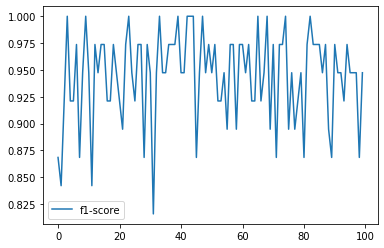

decision tree


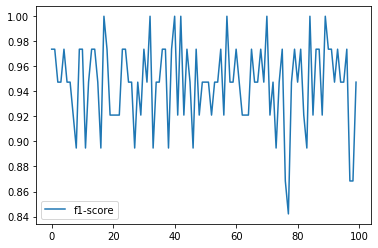

gradient boosted tree


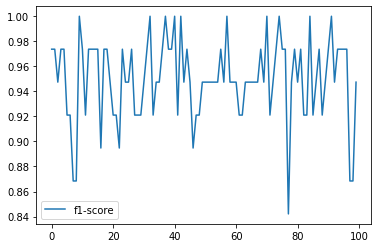

random forest


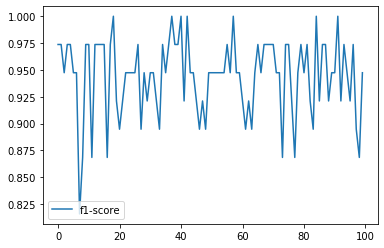

In [41]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

variable_accuracy = []
for i in range(100):
    np.random.seed(i)
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=i
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        variable_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in variable_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(recall)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

Here the random seed changes from 0 - 99.

logistic_regression


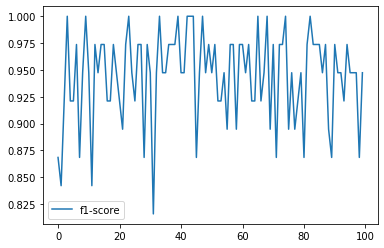

decision tree


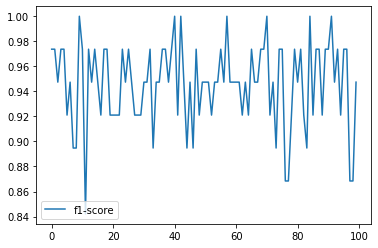

gradient boosted tree


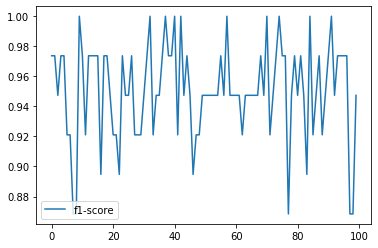

random forest


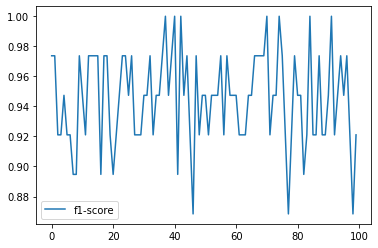

In [42]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

constant_accuracy = []
np.random.seed(10)
for i in range(100):
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=i
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(recall)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

Here the random seed is fixed at 10 (arbitrarily)

Now let's compare the CDFs in the constant case, version the variable case.

logistic_regression


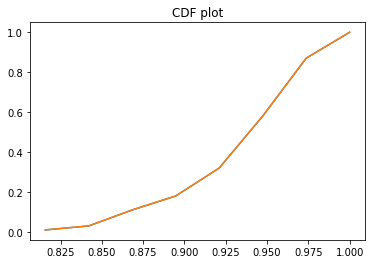

decision tree


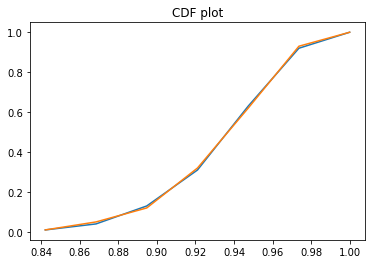

gradient boosted tree


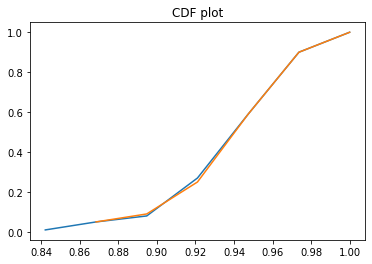

random forest


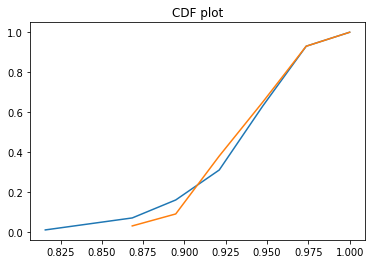

In [43]:
def plot_cdfs(dist_one, dist_two):
    cdf_one = CDF(dist_one)
    cdf_two = CDF(dist_two)
    plt.plot(cdf_one.xs, cdf_one.ps, cdf_two.xs, cdf_two.ps)
    plt.title("CDF plot")
    plt.show()
    
for clf in clf_names:
    print(clf)
    variable_f1 = [elem["f1_score"] 
          for elem in variable_accuracy 
          if elem["clf"] == clf]

    constant_f1 = [elem["f1_score"] 
          for elem in constant_accuracy 
          if elem["clf"] == clf]

    plot_cdfs(variable_f1, constant_f1)